# Scaling et normalisation



Points traités dans ce notebook :

- Mise en place de notre environnement
- Mise à l'échelle ou normalisation : Quelle est la différence ?
- Pratiquer la mise à l'échelle
- Pratiquer la normalisation

# Mise en place de notre environnement

In [2]:
# librairie utilisée
import pandas as pd
import numpy as np

# pour Box-Cox Transformation
from scipy import stats

# pour la mise à l'échelle min_max
from mlxtend.preprocessing import minmax_scaling

# librairie dataviz
import seaborn as sns
import matplotlib.pyplot as plt

# importer le df
kickstarters_2017 = pd.read_csv("/Users/jl/Downloads/ks-projects-201801.csv")

# reproductibilité
np.random.seed(0)

# Mise à l'échelle ou normalisation : Quelle est la différence ?

Je vais m'interesser à présent à la mise à l'échelle et à la normalisation.


Mise à l'échelle et normalisation : Quelle est la différence ?
L'une des raisons pour lesquelles il est facile de confondre la mise à l'échelle et la normalisation est que ces termes sont parfois utilisés de manière interchangeable et, pour rendre les choses encore plus confuses, ils sont très similaires ! Dans les deux cas, vous transformez les valeurs des variables numériques de manière à ce que les points de données transformés aient des propriétés utiles spécifiques.
La différence est que, dans le cas de la mise à l'échelle, vous modifiez l'étendue de vos données alors que, dans le cas de la normalisation, vous modifiez la forme de la distribution de vos données.


Mise à l'échelle
Cela signifie que vous transformez vos données pour qu'elles s'inscrivent dans une échelle spécifique, comme 0-100 ou 0-1. Vous souhaitez mettre les données à l'échelle lorsque vous utilisez des méthodes basées sur des mesures de distance entre les points de données, comme les machines à vecteurs de support, ou SVM, ou les k-voisins les plus proches, ou KNN. Avec ces algorithmes, un changement de "1" dans n'importe quelle caractéristique numérique se voit accorder la même importance.


Par exemple, vous pouvez examiner les prix de certains produits en yens et en dollars américains. Un dollar américain vaut environ 100 yens, mais si vous n'échelonnez pas vos prix, des méthodes telles que SVM ou KNN considéreront qu'une différence de prix de 1 yen est aussi importante qu'une différence de 1 dollar américain ! Cela ne correspond manifestement pas à nos intuitions sur le monde. Avec la monnaie, vous pouvez convertir entre les devises. Mais qu'en est-il lorsque l'on s'intéresse à des données telles que la taille et le poids ? Le nombre de livres correspondant à un pouce (ou le nombre de kilogrammes correspondant à un mètre) n'est pas tout à fait clair.


La mise à l'échelle de vos variables vous permet de comparer différentes variables sur un pied d'égalité.

/var/folders/r5/sycktgpj0ln8vbwphhbh5mb00000gn/T/ipykernel_30292/1775439054.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
/var/folders/r5/sycktgpj0ln8vbwphhbh5mb00000gn/T/ipykernel_30292/1775439054.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, 

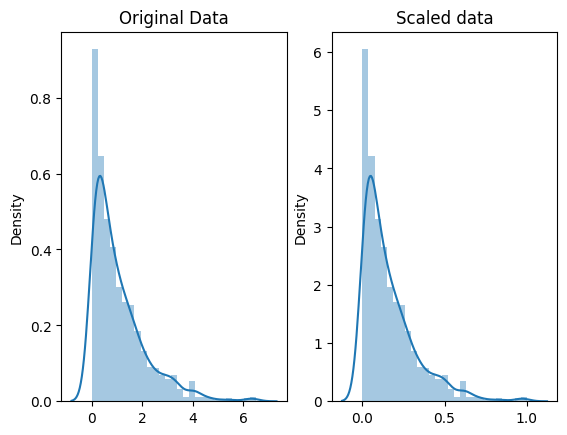

In [4]:
# générer 1000 points de données tirés aléatoirement d'une distribution exponentielle
original_data = np.random.exponential(size = 1000)

# échelle mix-max des données entre 0 et 1
scaled_data = minmax_scaling(original_data, columns = [0])

# tracer les deux ensemble pour les comparer
fig, ax=plt.subplots(1,2)

sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data");


# on remarque que la forme des données ne change pas, mais qu'au lieu de s'échelonner de 0 à 8, elles s'échelonnent maintenant de 0 à 1

# Normalisation

La mise à l'échelle ne fait que modifier l'étendue de vos données.

La normalisation est une transformation plus radicale. Le but de la normalisation est de modifier vos observations de manière à ce qu'elles puissent être décrites comme une distribution normale.

Distribution normale : Également connue sous le nom de "courbe en cloche", il s'agit d'une distribution statistique spécifique dans laquelle un nombre à peu près égal d'observations se situe au-dessus et au-dessous de la moyenne, la moyenne et la médiane sont identiques et il y a davantage d'observations plus proches de la moyenne.
La distribution normale est également connue sous le nom de distribution gaussienne.

En général, vous ne voudrez normaliser vos données que si vous utilisez une technique d'apprentissage automatique ou de statistique qui suppose que vos données sont normalement distribuées :
t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes en sont quelques exemples

rappel : toute méthode dont le nom contient le mot "gaussien" suppose probablement la normalité

La méthode utilisée ici pour normaliser s'appelle la transformation de Box-Cox. Voyons rapidement à quoi ressemble la normalisation de certaines données :

/var/folders/r5/sycktgpj0ln8vbwphhbh5mb00000gn/T/ipykernel_30292/3313650384.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
/var/folders/r5/sycktgpj0ln8vbwphhbh5mb00000gn/T/ipykernel_30292/3313650384.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data

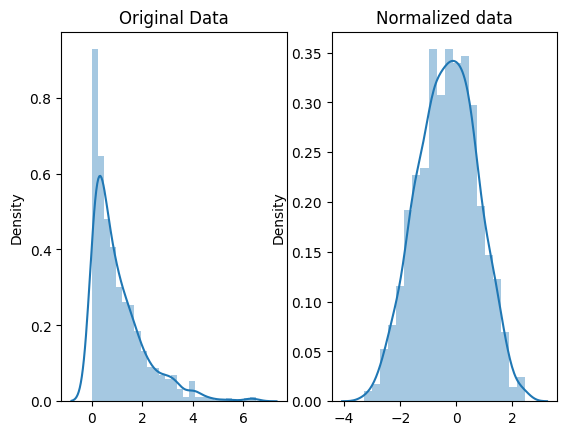

In [6]:
# normaliser les données exponentielles avec boxcox
normalized_data = stats.boxcox(original_data)

# tracer les deux ensemble pour comparer
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data");

remarque : la forme de nos données a changé. Avant la normalisation, elles avaient presque la forme d'un L. Mais après la normalisation, elles ressemblent davantage au contour d'une cloche (d'où le terme "courbe en cloche").

# Pratiquer la mise à l'échelle

Pour pratiquer la mise à l'échelle et la normalisation, nous allons utiliser un ensemble de données de campagnes Kickstarter. (Kickstarter est un site web où l'on peut demander aux gens d'investir dans divers projets et produits conceptuels).

Commençons par mettre à l'échelle les objectifs de chaque campagne, c'est-à-dire la somme d'argent demandée.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
/var/folders/r5/sycktgpj0ln8vbwphhbh5mb00000gn/T/ipykernel_30292/35735341.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
/var/folders/r5/sycktgpj0ln8vbwphhbh5mb00000gn/T/ipykernel_30292/35735341.py:13: UserWarning: 

`distplot` is a deprecated function and will be 

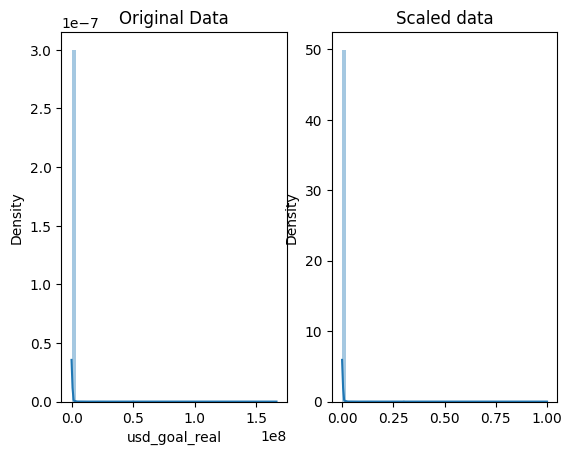

In [7]:
# sélectionner la colonne usd_goal_real
usd_goal = kickstarters_2017.usd_goal_real

# mettre à l'échelle les buts de 0 à 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# tracer les données originales et mises à l'échelle ensemble pour les comparer
fig, ax=plt.subplots(1,2)

sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data");

Analyse : la mise à l'échelle modifie considérablement les échelles des graphiques (mais pas la forme des données : il semble que la plupart des campagnes aient des objectifs modestes, mais que quelques-unes aient des objectifs très importants).

# Pratiquer la normalisation

A présent, nous allons normaliser le montant des promesses de dons pour chaque campagne.

/var/folders/r5/sycktgpj0ln8vbwphhbh5mb00000gn/T/ipykernel_30292/3775682708.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_pledges, ax=ax[0])
/var/folders/r5/sycktgpj0ln8vbwphhbh5mb00000gn/T/ipykernel_30292/3775682708.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized

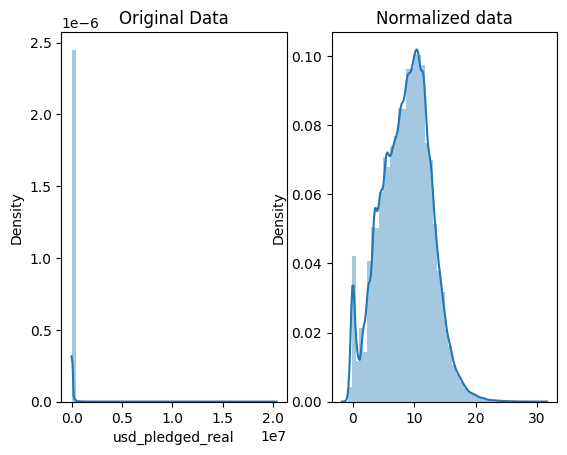

In [9]:
# obtenir l'indice de toutes les promesses de dons positives (Box-Cox ne prend que les valeurs positives)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# obtenir uniquement les promesses de dons positives (en utilisant leurs indices)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normaliser les promesses (avec Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# tracer les deux ensemble pour les comparer
fig, ax=plt.subplots(1,2)

sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data");

analyse : Ce n'est pas parfait mais c'est beaucoup plus proche de la normale !